Dataset Scource: https://www.kaggle.com/datasets/ramkrijal/agriculture-vegetables-fruits-time-series-prices/data

I do data exploration on Potato Red , Kiwi 😂 sorry for my data

# Libraries and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Explore Dataset

| Column Name            | Explanation                                                                                                                                |
| ---------------------- | ------------------------------------------------------------------------------------------------------------------------------------------ |
| **SN (Serial Number)** | A unique ID or row number used to keep the data in order. It usually doesn’t have analytical meaning.                                      |
| **Commodity**          | The name of the fruit or vegetable (e.g., Tomato, Banana, Potato...).                                                                      |
| **Date**               | The specific day the price was recorded. Dates range from **2013 to 2021**.                                                                |
| **Unit**               | The unit of measurement for the prices. Here it is **Per KG** (per kilogram).                                                              |
| **Minimum**            | The **lowest price** the commodity was sold for on that day.                                                                               |
| **Maximum**            | The **highest price** the commodity was sold for on that day.                                                                              |
| **Average**            | The **average selling price** of the commodity on that day (usually calculated by summing all prices and dividing by the number of sales). |


In [2]:
df = pd.read_csv('kalimati_tarkari_dataset.csv')
df.head()

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0


In [3]:
df.Commodity.unique()

array(['Tomato Big(Nepali)', 'Tomato Small(Local)', 'Potato Red',
       'Potato White', 'Onion Dry (Indian)', 'Carrot(Local)',
       'Cabbage(Local)', 'Cauli Local', 'Raddish Red',
       'Raddish White(Local)', 'Brinjal Long', 'Brinjal Round',
       'Cow pea(Long)', 'Green Peas', 'French Bean(Local)',
       'Soyabean Green', 'Bitter Gourd', 'Bottle Gourd',
       'Pointed Gourd(Local)', 'Snake Gourd', 'Smooth Gourd',
       'Sponge Gourd', 'Pumpkin', 'Squash(Long)', 'Turnip', 'Okara',
       'Christophine', 'Brd Leaf Mustard', 'Spinach Leaf', 'Cress Leaf',
       'Mustard Leaf', 'Fenugreek Leaf', 'Onion Green', 'Mushroom(Kanya)',
       'Asparagus', 'Neuro', 'Brocauli', 'Sugarbeet', 'Drumstick',
       'Red Cabbbage', 'Lettuce', 'Celery', 'Parseley', 'Fennel Leaf',
       'Mint', 'Turnip A', 'Tamarind', 'Bamboo Shoot', 'Tofu', 'Gundruk',
       'Apple(Jholey)', 'Banana', 'Lime', 'Pomegranate', 'Mango(Maldah)',
       'Grapes(Green)', 'Water Melon(Green)', 'Sweet Orange', 'Pineappl

In [4]:
category_mapping = {
    'Tomato Big(Nepali)': 'Vegetable',
    'Tomato Small(Local)': 'Vegetable',
    'Potato Red': 'Vegetable',
    'Potato White': 'Vegetable',
    'Onion Dry (Indian)': 'Vegetable',
    'Carrot(Local)': 'Vegetable',
    'Cabbage(Local)': 'Vegetable',
    'Cauli Local': 'Vegetable',
    'Raddish Red': 'Vegetable',
    'Raddish White(Local)': 'Vegetable',
    'Brinjal Long': 'Vegetable',
    'Brinjal Round': 'Vegetable',
    'Cow pea(Long)': 'Vegetable',
    'Green Peas': 'Vegetable',
    'French Bean(Local)': 'Vegetable',
    'Soyabean Green': 'Vegetable',
    'Bitter Gourd': 'Vegetable',
    'Bottle Gourd': 'Vegetable',
    'Pointed Gourd(Local)': 'Vegetable',
    'Snake Gourd': 'Vegetable',
    'Smooth Gourd': 'Vegetable',
    'Sponge Gourd': 'Vegetable',
    'Pumpkin': 'Vegetable',
    'Squash(Long)': 'Vegetable',
    'Turnip': 'Vegetable',
    'Okara': 'Vegetable',
    'Christophine': 'Vegetable',
    'Brd Leaf Mustard': 'Herb',
    'Spinach Leaf': 'Herb',
    'Cress Leaf': 'Herb',
    'Mustard Leaf': 'Herb',
    'Fenugreek Leaf': 'Herb',
    'Onion Green': 'Vegetable',
    'Mushroom(Kanya)': 'Vegetable',
    'Asparagus': 'Vegetable',
    'Neuro': 'Other',
    'Brocauli': 'Vegetable',
    'Sugarbeet': 'Vegetable',
    'Drumstick': 'Vegetable',
    'Red Cabbbage': 'Vegetable',
    'Lettuce': 'Vegetable',
    'Celery': 'Vegetable',
    'Parseley': 'Herb',
    'Fennel Leaf': 'Herb',
    'Mint': 'Herb',
    'Turnip A': 'Vegetable',
    'Tamarind': 'Fruit',
    'Bamboo Shoot': 'Vegetable',
    'Tofu': 'Processed',
    'Gundruk': 'Processed',
    'Apple(Jholey)': 'Fruit',
    'Banana': 'Fruit',
    'Lime': 'Fruit',
    'Pomegranate': 'Fruit',
    'Mango(Maldah)': 'Fruit',
    'Grapes(Green)': 'Fruit',
    'Water Melon(Green)': 'Fruit',
    'Sweet Orange': 'Fruit',
    'Pineapple': 'Fruit',
    'Cucumber(Local)': 'Vegetable',
    'Jack Fruit': 'Fruit',
    'Papaya(Nepali)': 'Fruit',
    'Sugarcane': 'Other',
    'Ginger': 'Herb',
    'Chilli Dry': 'Herb',
    'Chilli Green': 'Herb',
    'Capsicum': 'Vegetable',
    'Garlic Green': 'Herb',
    'Coriander Green': 'Herb',
    'Garlic Dry Chinese': 'Herb',
    'Garlic Dry Nepali': 'Herb',
    'Clive Dry': 'Herb',
    'Clive Green': 'Herb',
    'Fish Fresh': 'Fish',
    'Arum': 'Vegetable',
    'Maize': 'Other',
    'Sweet Lime': 'Fruit',
    'Guava': 'Fruit',
    'Mombin': 'Fruit',
    'Barela': 'Fruit',
    'Lemon': 'Fruit',
    'Sword Bean': 'Vegetable',
    'Orange(Nepali)': 'Fruit',
    'Bakula': 'Other',
    'Yam': 'Vegetable',
    'Sweet Potato': 'Vegetable',
    'Mandarin': 'Fruit',
    'Knolkhol': 'Vegetable',
    'Cauli Terai': 'Vegetable',
    'Kinnow': 'Fruit',
    'Strawberry': 'Fruit',
    'Bauhania flower': 'Other',
    'Pear(Local)': 'Fruit',
    'Litchi(Local)': 'Fruit',
    'Musk Melon': 'Fruit',
    'Tomato Small(Tunnel)': 'Vegetable',
    'Potato Red(Indian)': 'Vegetable',
    'Mushroom(Button)': 'Vegetable',
    'Apple(Fuji)': 'Fruit',
    'Cucumber(Hybrid)': 'Vegetable',
    'Chilli Green(Bullet)': 'Herb',
    'Chilli Green(Machhe)': 'Herb',
    'Chilli Green(Akbare)': 'Herb',
    'Fish Fresh(Rahu)': 'Fish',
    'Fish Fresh(Bachuwa)': 'Fish',
    'Fish Fresh(Chhadi)': 'Fish',
    'Fish Fresh(Mungari)': 'Fish',
    'Raddish White(Hybrid)': 'Vegetable',
    'Cowpea(Short)': 'Vegetable',
    'French Bean(Hybrid)': 'Vegetable',
    'French Bean(Rajma)': 'Vegetable',
    'Squash(Round)': 'Vegetable',
    'Mango(Dushari)': 'Fruit',
    'Water Melon(Dotted)': 'Fruit',
    'Papaya(Indian)': 'Fruit',
    'Litchi(Indian)': 'Fruit',
    'Cabbage': 'Vegetable',
    'Potato Red(Mude)': 'Vegetable',
    'Tomato Big(Indian)': 'Vegetable',
    'Pear(Chinese)': 'Fruit',
    'Tomato Small(Indian)': 'Vegetable',
    'Orange(Indian)': 'Fruit',
    'Carrot(Terai)': 'Vegetable',
    'Tomato Small(Terai)': 'Vegetable',
    'Onion Dry (Chinese)': 'Vegetable',
    'Cabbage(Terai)': 'Vegetable',
    'Cauli Local(Jyapu)': 'Vegetable',
    'Pointed Gourd(Terai)': 'Vegetable',
    'Grapes(Black)': 'Fruit',
    'Kiwi': 'Fruit',
    'Mango(Calcutte)': 'Fruit',
    'Mango(Chousa)': 'Fruit'
}


In [5]:
df['Category'] = df['Commodity'].map(category_mapping)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197161 entries, 0 to 197160
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SN         197161 non-null  int64  
 1   Commodity  197161 non-null  object 
 2   Date       197161 non-null  object 
 3   Unit       197161 non-null  object 
 4   Minimum    197161 non-null  float64
 5   Maximum    197161 non-null  float64
 6   Average    197161 non-null  float64
 7   Category   197161 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 12.0+ MB


In [7]:
df.tail(10)

,SN,Commodity,Date,Unit,Minimum,Maximum,Average,Category
197151,197151,Chilli Green(Akbare),2021-05-13,KG,140.0,150.0,145.0,Herb
197152,197152,Capsicum,2021-05-13,Kg,75.0,80.0,77.5,Vegetable
197153,197153,Garlic Green,2021-05-13,Kg,50.0,60.0,55.0,Herb
197154,197154,Coriander Green,2021-05-13,Kg,80.0,90.0,85.0,Herb
197155,197155,Garlic Dry Chinese,2021-05-13,Kg,240.0,250.0,245.0,Herb
197156,197156,Garlic Dry Nepali,2021-05-13,Kg,100.0,120.0,110.0,Herb
197157,197157,Fish Fresh(Rahu),2021-05-13,KG,270.0,280.0,275.0,Fish
197158,197158,Fish Fresh(Bachuwa),2021-05-13,KG,225.0,235.0,230.0,Fish
197159,197159,Fish Fresh(Chhadi),2021-05-13,KG,220.0,230.0,225.0,Fish
197160,197160,Fish Fresh(Mungari),2021-05-13,KG,240.0,250.0,245.0,Fish


In [8]:
df.value_counts()

SN      Commodity            Date        Unit  Minimum  Maximum  Average  Category 
0       Tomato Big(Nepali)   2013-06-16  Kg    35.0     40.0     37.5     Vegetable    1
131504  Ginger               2019-01-04  Kg    110.0    120.0    115.0    Herb         1
131434  Papaya(Nepali)       2019-01-03  Kg    80.0     90.0     85.0     Fruit        1
131435  Mombin               2019-01-03  Kg    55.0     60.0     57.5     Fruit        1
131436  Ginger               2019-01-03  Kg    110.0    120.0    115.0    Herb         1
                                                                                      ..
65724   Fish Fresh           2016-04-12  Kg    230.0    240.0    235.0    Fish         1
65725   Tomato Big(Nepali)   2016-04-13  Kg    30.0     32.0     31.0     Vegetable    1
65726   Tomato Small(Local)  2016-04-13  Kg    25.0     30.0     27.5     Vegetable    1
65727   Potato Red           2016-04-13  Kg    20.0     25.0     22.5     Vegetable    1
197160  Fish Fresh(Mungari

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%m-%d")
df.set_index('Date', inplace = True)
df.head()

,SN,Commodity,Unit,Minimum,Maximum,Average,Category
Date,,,,,,,
2013-06-16,0,Tomato Big(Nepali),Kg,35.0,40.0,37.5,Vegetable
2013-06-16,1,Tomato Small(Local),Kg,26.0,32.0,29.0,Vegetable
2013-06-16,2,Potato Red,Kg,20.0,21.0,20.5,Vegetable
2013-06-16,3,Potato White,Kg,15.0,16.0,15.5,Vegetable
2013-06-16,4,Onion Dry (Indian),Kg,28.0,30.0,29.0,Vegetable


In [10]:
df.Unit.unique()

array(['Kg', 'Doz', '1 Pc', 'KG'], dtype=object)

In [11]:
df["Unit"] = df["Unit"].str.upper().str.strip()

In [12]:
df.Unit.unique()

array(['KG', 'DOZ', '1 PC'], dtype=object)

In [13]:
df.index = pd.to_datetime(df.index)

start_year = df.index.min()
end_year = df.index.max()

print(f"Data covers from {start_year} to {end_year}")

Data covers from 2013-06-16 00:00:00 to 2021-05-13 00:00:00


In [14]:
df.loc['2020-3-20']

,SN,Commodity,Unit,Minimum,Maximum,Average,Category
Date,,,,,,,
2020-03-20,163856,Tomato Big(Nepali),KG,45.0,50.0,47.5,Vegetable
2020-03-20,163857,Tomato Big(Indian),KG,45.0,50.0,47.5,Vegetable
2020-03-20,163858,Tomato Small(Local),KG,35.0,40.0,37.5,Vegetable
2020-03-20,163859,Tomato Small(Tunnel),KG,35.0,40.0,37.5,Vegetable
2020-03-20,163860,Tomato Small(Indian),KG,35.0,40.0,37.5,Vegetable
...,...,...,...,...,...,...,...
2020-03-20,163934,Garlic Dry Nepali,KG,250.0,270.0,260.0,Herb
2020-03-20,163935,Fish Fresh(Rahu),KG,285.0,290.0,287.5,Fish
2020-03-20,163936,Fish Fresh(Bachuwa),KG,220.0,225.0,222.5,Fish


In [15]:
df = df.drop(columns=['SN'])

In [16]:
df.shape

(197161, 6)

In [17]:
df["Category"].value_counts()

Vegetable    103002
Herb          43666
Fruit         37599
Processed      5114
Fish           4567
Other          3213
Name: Category, dtype: int64

In [18]:
print(df["Commodity"].value_counts())

Ginger                  2751
Cauli Local             2750
Cabbage(Local)          2749
Chilli Dry              2748
Raddish White(Local)    2747
                        ... 
Maize                     24
Mango(Calcutte)           23
Sweet Lime                14
Musk Melon                10
Mango(Chousa)              2
Name: Commodity, Length: 132, dtype: int64


In [19]:
pd.set_option('display.max_rows', None)

print(df["Commodity"].value_counts())

pd.reset_option('display.max_rows')

Ginger                   2751
Cauli Local              2750
Cabbage(Local)           2749
Chilli Dry               2748
Raddish White(Local)     2747
Potato Red               2746
Bamboo Shoot             2744
Banana                   2744
Brd Leaf Mustard         2742
Onion Dry (Indian)       2742
Tomato Small(Local)      2741
Coriander Green          2741
French Bean(Local)       2739
Brinjal Long             2736
Carrot(Local)            2736
Chilli Green             2735
Onion Green              2735
Spinach Leaf             2733
Mushroom(Kanya)          2730
Garlic Dry Chinese       2728
Lime                     2725
Capsicum                 2725
Pumpkin                  2715
Tamarind                 2715
Bottle Gourd             2700
Tofu                     2694
Cucumber(Local)          2686
Apple(Jholey)            2683
Water Melon(Green)       2679
Garlic Green             2675
Bitter Gourd             2670
Okara                    2663
Pomegranate              2642
Pineapple 

In [20]:
df.isna().sum()

Commodity    0
Unit         0
Minimum      0
Maximum      0
Average      0
Category     0
dtype: int64

In [21]:
df_m = df.resample('M').mean()
df_m.shape

C:\Users\original store\AppData\Local\Temp\ipykernel_10096\3544868071.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_m = df.resample('M').mean()


(96, 3)

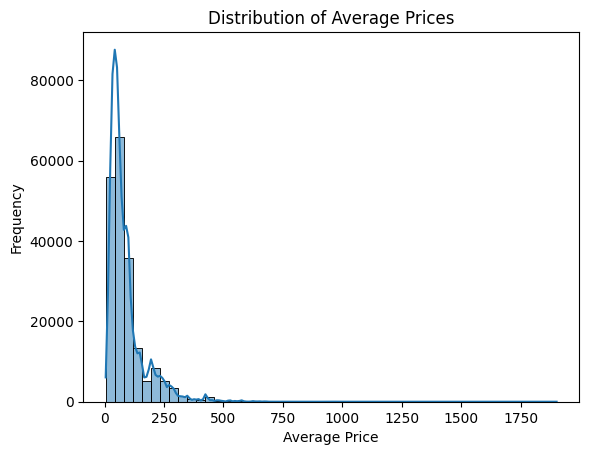

In [22]:
sns.histplot(df['Average'], bins=50, kde=True)
plt.title("Distribution of Average Prices")
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.show()

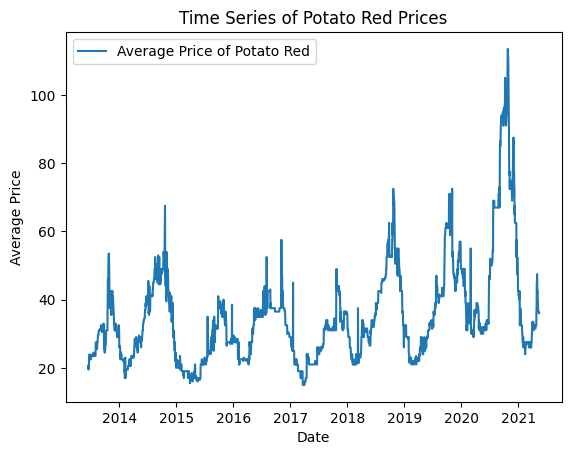

In [23]:
commodity = "Potato Red"
df_commodity = df[df['Commodity'] == commodity]
plt.plot(df_commodity.index, df_commodity['Average'], label=f'Average Price of {commodity}')
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.title(f"Time Series of {commodity} Prices")
plt.legend()
plt.show()

In [24]:
df_commodity

,Commodity,Unit,Minimum,Maximum,Average,Category
Date,,,,,,
2013-06-16,Potato Red,KG,20.0,21.0,20.5,Vegetable
2013-06-17,Potato Red,KG,20.0,21.0,20.5,Vegetable
2013-06-18,Potato Red,KG,19.0,20.0,19.5,Vegetable
2013-06-19,Potato Red,KG,20.0,21.0,20.5,Vegetable
2013-06-20,Potato Red,KG,20.0,21.0,20.5,Vegetable
...,...,...,...,...,...,...
2021-05-09,Potato Red,KG,35.0,38.0,36.5,Vegetable
2021-05-10,Potato Red,KG,35.0,38.0,36.5,Vegetable
2021-05-11,Potato Red,KG,35.0,38.0,36.5,Vegetable


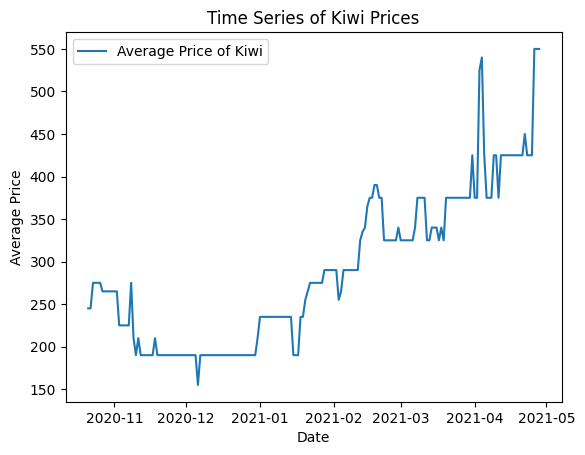

In [25]:
commodity = "Kiwi"
df_commodity_kiwi = df[df['Commodity'] == commodity]
plt.plot(df_commodity_kiwi.index, df_commodity_kiwi['Average'], label=f'Average Price of {commodity}')
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.title(f"Time Series of {commodity} Prices")
plt.legend()
plt.show()

C:\Users\original store\AppData\Local\Temp\ipykernel_10096\1783057924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commodity['7_day_rolling']= df_commodity['Average'].rolling(window = 7).mean()


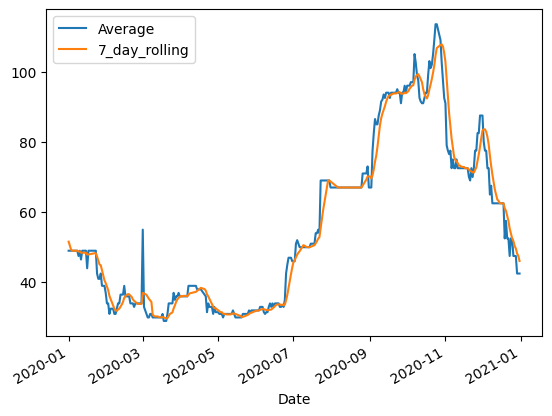

In [26]:
df_commodity['7_day_rolling']= df_commodity['Average'].rolling(window = 7).mean()
df_commodity[['Average', '7_day_rolling']].loc['2020'].plot()
plt.show()

In [27]:
df_commodity['daily_returns'] = df_commodity['Average'].pct_change() * 100

C:\Users\original store\AppData\Local\Temp\ipykernel_10096\276745461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commodity['daily_returns'] = df_commodity['Average'].pct_change() * 100


In [28]:
# Days with more than 10% change in closing price
df_commodity[abs(df_commodity['daily_returns']) > 10].head()

,Commodity,Unit,Minimum,Maximum,Average,Category,7_day_rolling,daily_returns
Date,,,,,,,,
2013-06-25,Potato Red,KG,23.0,25.0,24.0,Vegetable,21.000000,11.627907
2013-08-04,Potato Red,KG,27.0,28.0,27.5,Vegetable,24.071429,17.021277
2013-09-26,Potato Red,KG,24.0,27.0,25.5,Vegetable,30.428571,-16.393443
2013-10-20,Potato Red,KG,45.0,47.0,46.0,Vegetable,33.142857,48.387097
2013-10-30,Potato Red,KG,40.0,45.0,42.5,Vegetable,49.928571,-10.526316


# Data Visualization

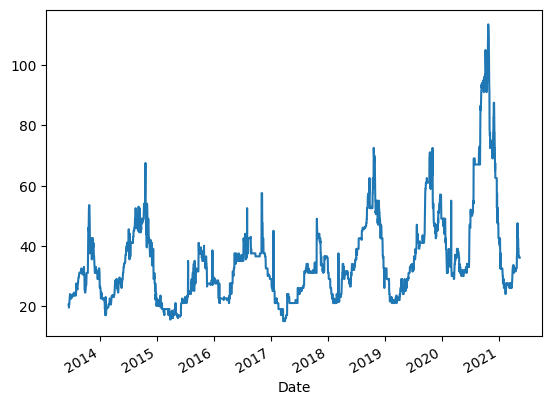

In [29]:
df_commodity['Average'].plot()
plt.show()

we can see the 2021 is most price for selling of Potato Red

In [30]:
df_commodity[['Average', '7_day_rolling']].corr()

,Average,7_day_rolling
Average,1.000000,0.987298
7_day_rolling,0.987298,1.000000


# Data Manipulation

# Seasonality

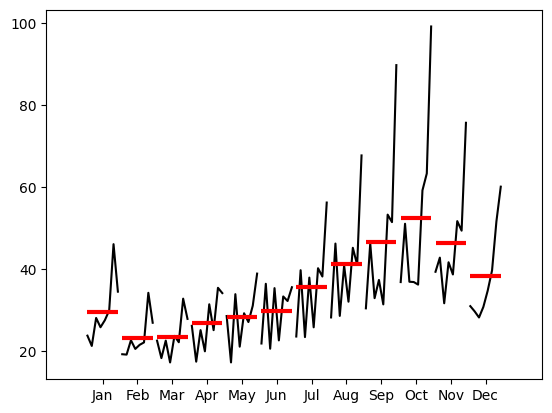

In [31]:
month_plot(df_commodity['Average'].resample('M').mean())
plt.show()

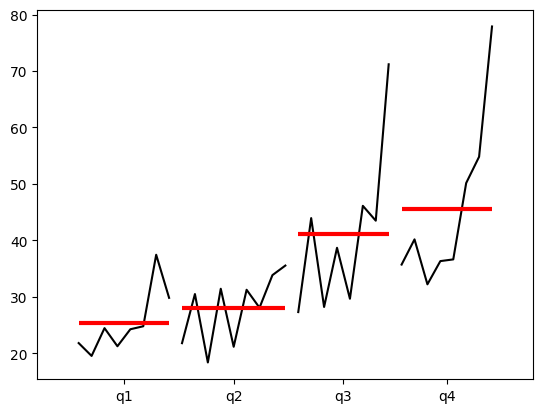

In [32]:
quarter_plot(df_commodity['Average'].resample('Q').mean())
plt.show()

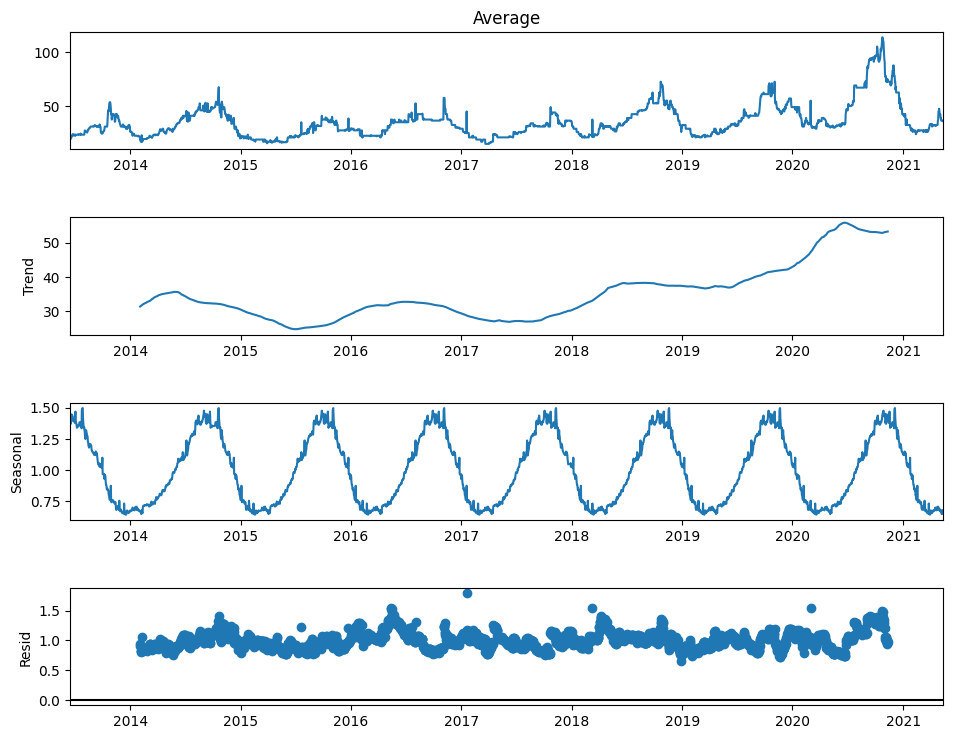

In [33]:
decomposition = seasonal_decompose(df_commodity['Average'],
                                   model = 'mul',
                                   period = 365)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

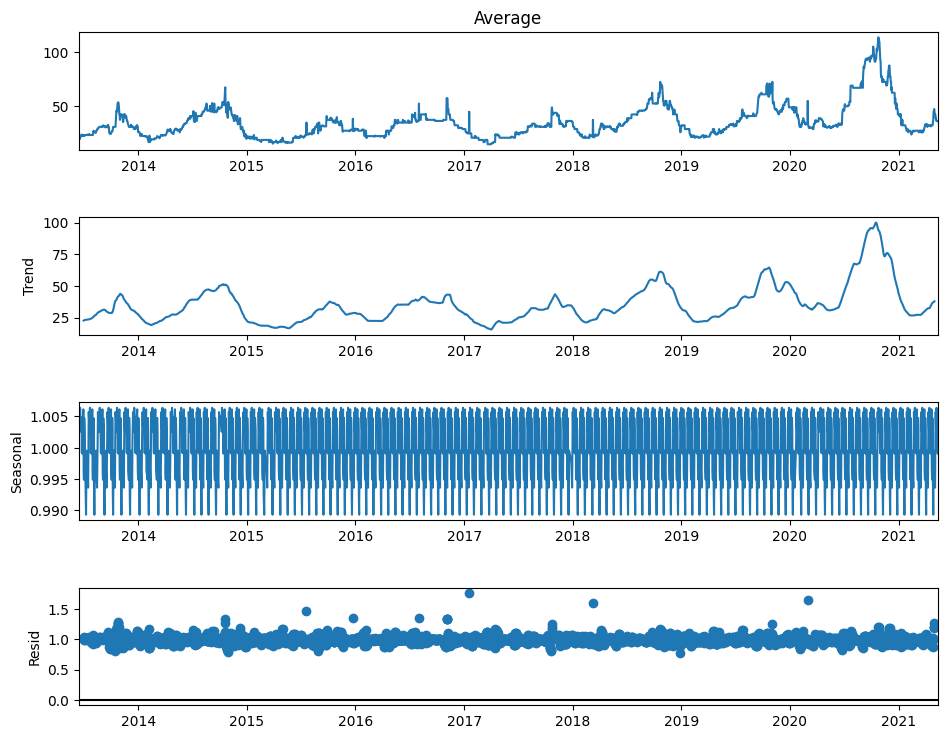

In [34]:
decomposition = seasonal_decompose(df_commodity['Average'],
                                   model = 'mul',
                                   period = 24)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

we can see equality seasonal and trend most between 2020 to 2021

Seasonality:
* 24 for hourly
* 7 or 365 for daily, but 7 is preferred for modeling
* 52 for weekly
* 12 for monthly
* 4 for quarterly
* 5 for weekdays

# Auto-Correlation

Autocorrelation measures the correlation between a time series and a lagged version of itself.

Purpose: To identify patterns or repeating cycles in a time series dataset.

Interpretation:
- Values range from -1 to 1.
- 1 indicates perfect positive correlation.
- -1 indicates perfect negative correlation.
- 0 indicates no correlation.

ACF Plot:
- X-axis: Lag periods
- Y-axis: Correlation coefficient

Key Features:
- At lag 0, autocorrelation is always 1 (a series is perfectly correlated with itself).
- Significant spikes at certain lags indicate repeating patterns.




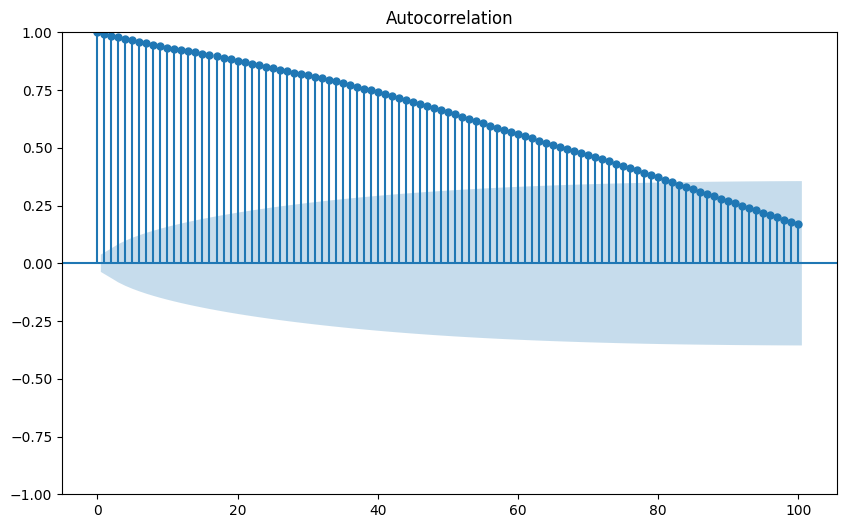

In [35]:
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df_commodity['Average'], lags = 100, ax = ax)
plt.show()

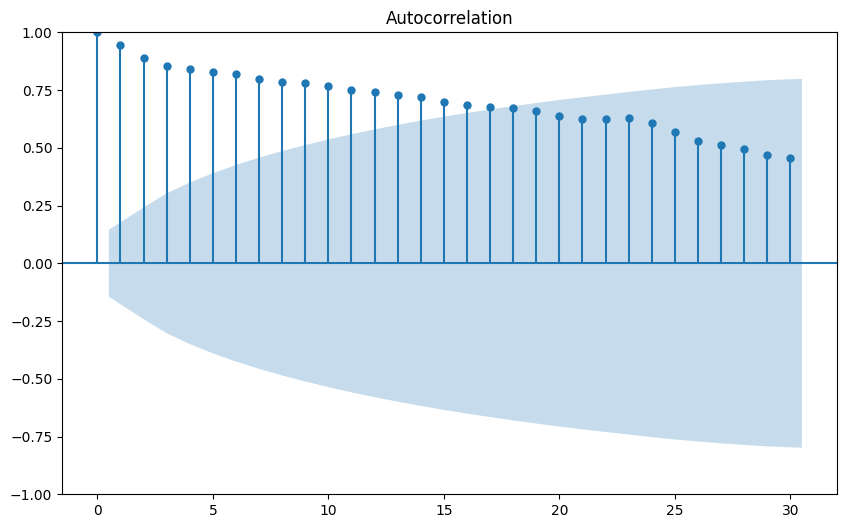

In [36]:
# Plot the autocorrelation (ACF) of the chocolate revenue values
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df_commodity_kiwi['Average'], lags = 30, ax = ax)
plt.show()

I apply on kiwi ,Potato Red to see how corr for pervious days 

# Partial Auto-correlation

PACF measures the correlation between a time series and its lag, after removing the effects of all shorter lags.

Purpose: To identify the direct relationship between an observation and its lag, without intermediate effects.

Main Difference between ACF and PACF:
- ACF: Measures overall correlation at each lag, including indirect effects.
- PACF: Measures direct correlation at each lag, excluding indirect effects.

e:\Apps\Python\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


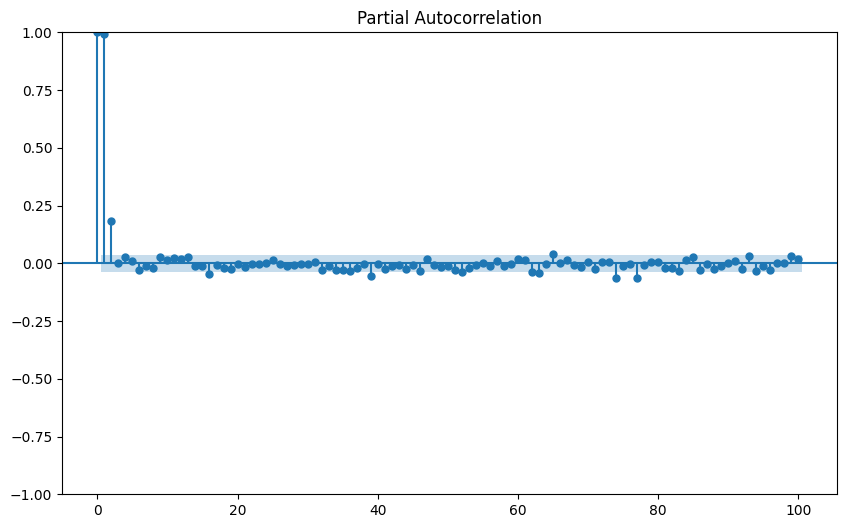

In [37]:
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df_commodity['Average'], lags = 100, ax = ax)
plt.show()

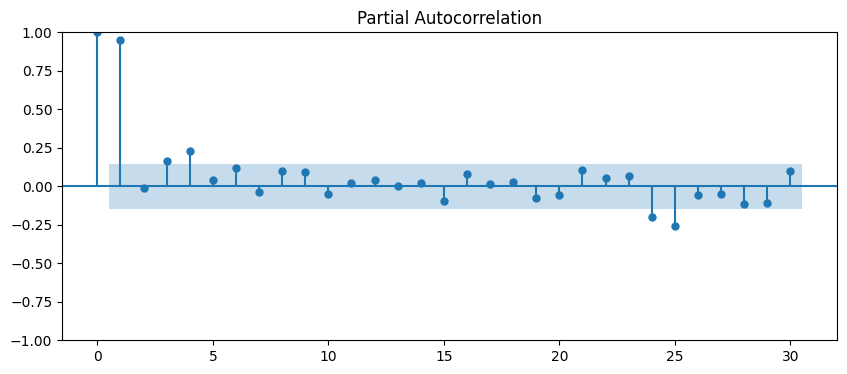

In [38]:
# Plot the partial autocorrelation (PACF) of the chocolate revenue values
fig, ax = plt.subplots(figsize = (10,4))
plot_pacf(df_commodity_kiwi['Average'], lags = 30, ax = ax)
plt.show()

we can see here prize for each commodity not depend on all days just for first day of second

# Forcasting Potato Red 🤣

In [60]:
df_commodity

,Commodity,Unit,Minimum,Maximum,Average,Category,7_day_rolling,daily_returns
Date,,,,,,,,
2013-06-16,Potato Red,KG,20.0,21.0,20.5,Vegetable,NaN,NaN
2013-06-17,Potato Red,KG,20.0,21.0,20.5,Vegetable,NaN,0.000000
2013-06-18,Potato Red,KG,19.0,20.0,19.5,Vegetable,NaN,-4.878049
2013-06-19,Potato Red,KG,20.0,21.0,20.5,Vegetable,NaN,5.128205
2013-06-20,Potato Red,KG,20.0,21.0,20.5,Vegetable,NaN,0.000000
...,...,...,...,...,...,...,...,...
2021-05-09,Potato Red,KG,35.0,38.0,36.5,Vegetable,38.928571,0.000000
2021-05-10,Potato Red,KG,35.0,38.0,36.5,Vegetable,38.071429,0.000000
2021-05-11,Potato Red,KG,35.0,38.0,36.5,Vegetable,37.214286,0.000000


In [47]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [77]:
df_commodity.index = pd.to_datetime(df_commodity.index)

df_commodity = df_commodity.sort_index()

last_date = df_commodity.index.max()
cutoff_date = last_date - pd.DateOffset(months=12)

train = df_commodity[df_commodity.index < cutoff_date]
test = df_commodity[df_commodity.index >= cutoff_date]

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print("Train last date:", train.index.max().date())
print("Test first date:", test.index.min().date())


Train shape: (2384, 8)
Test shape: (362, 8)
Train last date: 2020-05-12
Test first date: 2020-05-13


In [78]:
test.head()

,Commodity,Unit,Minimum,Maximum,Average,Category,7_day_rolling,daily_returns
Date,,,,,,,,
2020-05-13,Potato Red,KG,31.0,33.0,32.0,Vegetable,31.142857,3.225806
2020-05-14,Potato Red,KG,30.0,32.0,31.0,Vegetable,31.142857,-3.125000
2020-05-15,Potato Red,KG,29.0,31.0,30.0,Vegetable,31.000000,-3.225806
2020-05-16,Potato Red,KG,29.0,31.0,30.0,Vegetable,30.857143,0.000000
2020-05-17,Potato Red,KG,29.0,31.0,30.0,Vegetable,30.714286,0.000000


In [79]:
train_series = train["Average"]
test_series = test["Average"]
train_series = train_series.dropna()
model_simple = SimpleExpSmoothing(train_series).fit()
predictions_simple = model_simple.forecast(len(test_series))

e:\Apps\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Apps\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


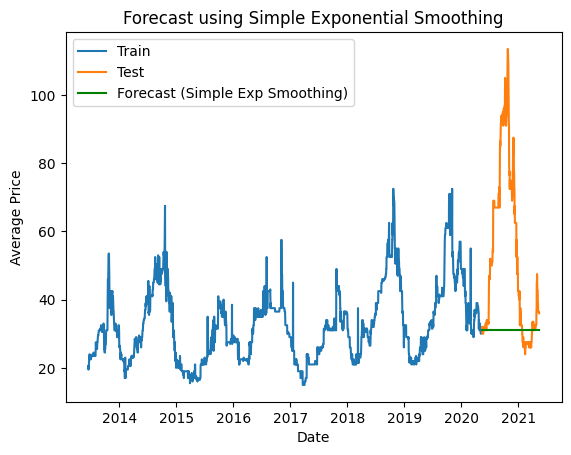

In [81]:
plt.plot(train_series.index, train_series, label="Train")
plt.plot(test_series.index, test_series, label="Test")
plt.plot(test_series.index, predictions_simple, label="Forecast (Simple Exp Smoothing)", color="Green")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.title("Forecast using Simple Exponential Smoothing")
plt.show()

In [84]:
model_double = ExponentialSmoothing(train_series,
                                    trend = 'mul',
                                    seasonal = None).fit()
predictions_double = model_double.forecast(len(test_series))

e:\Apps\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Apps\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
e:\Apps\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


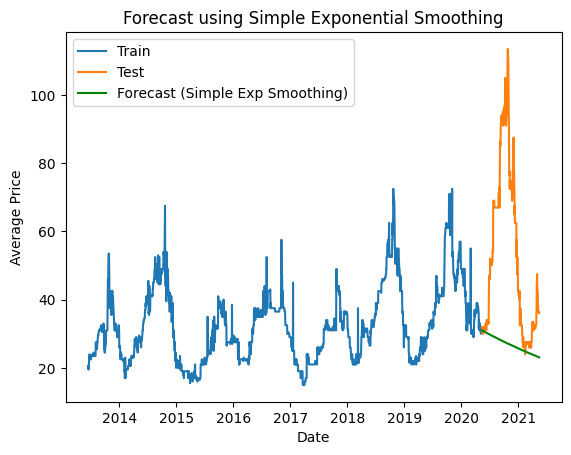

In [85]:
plt.plot(train_series.index, train_series, label="Train")
plt.plot(test_series.index, test_series, label="Test")
plt.plot(test_series.index, predictions_double, label="Forecast (Simple Exp Smoothing)", color="Green")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.title("Forecast using Simple Exponential Smoothing")
plt.show()

In [98]:
model_triple = ExponentialSmoothing(train_series,
                                    trend = 'mul',
                                    seasonal = "mul",
                                    seasonal_periods = 365*2).fit()
predictions_triple = model_triple.forecast(len(test))

e:\Apps\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Apps\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
e:\Apps\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


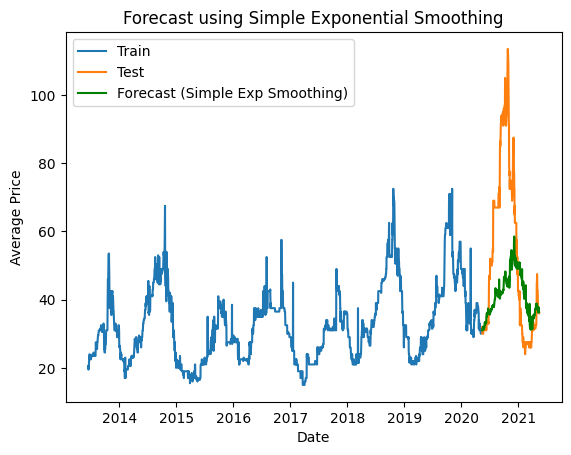

In [97]:
plt.plot(train_series.index, train_series, label="Train")
plt.plot(test_series.index, test_series, label="Test")
plt.plot(test_series.index, predictions_triple, label="Forecast (Simple Exp Smoothing)", color="Green")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.title("Forecast using Simple Exponential Smoothing")
plt.show()

i try 365 day the forcast trand not accuert so for increasing days the forcasting will be improved

In [101]:
from math import sqrt

mae = mean_absolute_error(test_series, predictions_triple)
rmse = sqrt(mean_squared_error(test_series, predictions_triple))
mape = mean_absolute_percentage_error(test_series, predictions_triple)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {mape:.2f} %")

The MAE is 25.35
The RMSE is 31.72
The MAPE is 0.42 %


# Predicting the future

In [107]:
model = ExponentialSmoothing(df_commodity.Average,
                             trend = 'add',
                             seasonal = "mul",
                             seasonal_periods = 365).fit()

e:\Apps\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Apps\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [108]:
forecast = model.forecast(13)
forecast

e:\Apps\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2746    37.420437
2747    37.940914
2748    37.818762
2749    37.990721
2750    37.665532
2751    37.690758
2752    37.608518
2753    37.713633
2754    37.633204
2755    37.974678
2756    37.439837
2757    37.612430
2758    37.600398
dtype: float64